<a href="https://colab.research.google.com/github/bleedblue26/tensorflow/blob/main/nba_data_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# Download Data

In [2]:
nba_data = pd.read_csv('https://raw.githubusercontent.com/bleedblue26/tensorflow/main/nba_salary_stats.csv')
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


# Clean Data

### Delete unknown values

In [3]:
nba_data.isna().sum()
nba_data = nba_data.dropna()

### Delete unneeded data

In [4]:
nba_data_numeric = nba_data.copy()
# nba_data_numeric.select_dtypes(include='object') # get all string columns
# nba_data_numeric.dtypes
del nba_data_numeric['first_name']
del nba_data_numeric['last_name']
del nba_data_numeric['team']
del nba_data_numeric['pos']
nba_data_numeric.head()


,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904


### Convert currency to float

In [5]:
def clean_currency(x):
  if isinstance(x, str):
    return (x.replace('$', '').replace(',', ''))
  return x

In [6]:
nba_data_numeric['salary'] = nba_data_numeric['salary'].apply(clean_currency).astype('float')

In [7]:
np.shape(nba_data_numeric)
nba_data_numeric.describe()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,2.890000e+02,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.00000,289.000000
mean,8.972877e+06,25.768166,56.619377,30.415225,1373.657439,237.546713,514.283737,0.458730,74.276817,208.335640,...,0.758394,55.598616,194.788927,250.387543,140.802768,44.529412,26.709343,75.211073,110.83045,647.304498
std,1.008679e+07,4.378557,18.081042,26.947104,698.833132,164.543135,347.674340,0.072096,63.139612,166.382283,...,0.109234,49.172226,138.198229,177.846596,126.966637,28.249385,24.822116,58.024125,58.04586,455.553247
min,5.318000e+03,19.000000,9.000000,0.000000,35.000000,3.000000,13.000000,0.231000,0.000000,1.000000,...,0.333000,2.000000,3.000000,7.000000,0.000000,0.000000,0.000000,2.000000,4.00000,12.000000
25%,2.033160e+06,22.000000,47.000000,5.000000,799.000000,110.000000,247.000000,0.411000,21.000000,70.000000,...,0.700000,22.000000,97.000000,125.000000,51.000000,25.000000,10.000000,38.000000,68.00000,299.000000
50%,4.259259e+06,25.000000,62.000000,21.000000,1406.000000,212.000000,465.000000,0.451000,57.000000,169.000000,...,0.770000,39.000000,174.000000,217.000000,99.000000,41.000000,19.000000,57.000000,106.00000,588.000000
75%,1.242000e+07,29.000000,70.000000,57.000000,1931.000000,324.000000,723.000000,0.496000,115.000000,320.000000,...,0.838000,73.000000,252.000000,334.000000,188.000000,62.000000,35.000000,100.000000,155.00000,892.000000
max,4.578097e+07,38.000000,82.000000,80.000000,2743.000000,774.000000,1564.000000,0.693000,285.000000,750.000000,...,1.000000,279.000000,813.000000,1019.000000,702.000000,138.000000,177.000000,292.000000,286.00000,2118.000000


# Visualize data

### Box plots

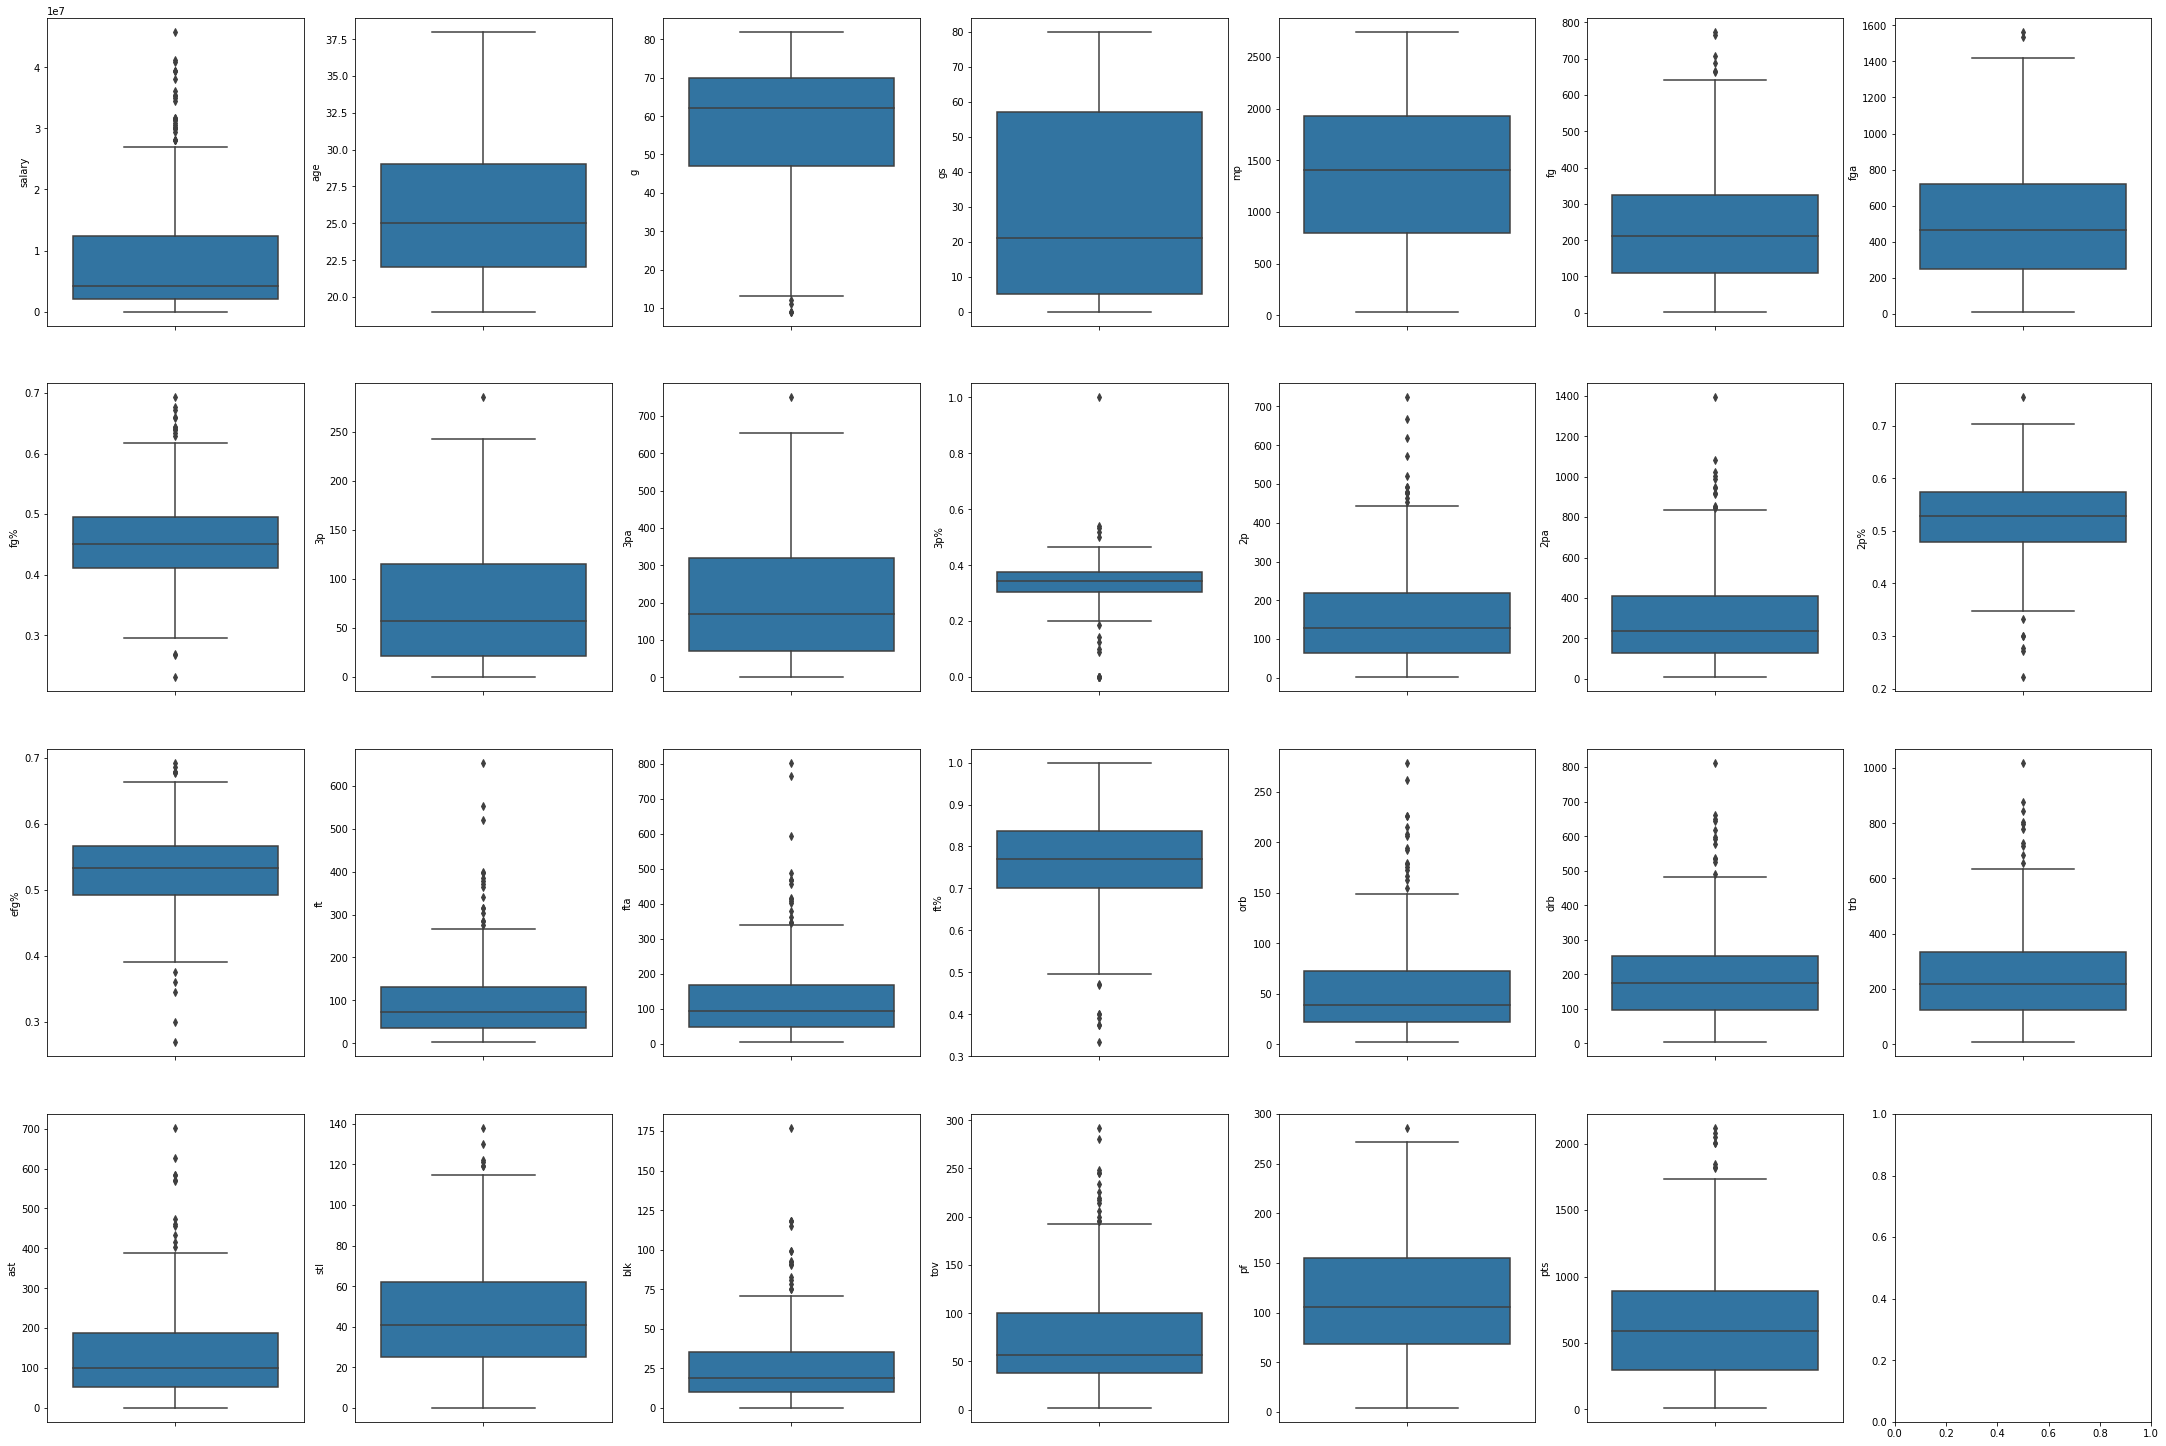

In [8]:
fig, axs = plt.subplots(nrows=4, ncols=7,figsize=(30,20))
index = 0
axs = axs.flatten()
for k,v in nba_data_numeric.items():
  sns.boxplot(y=k, data=nba_data_numeric, ax=axs[index])
  index +=1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=5)

### Get % of outliers

In [9]:
for k,v in nba_data_numeric.items():
  q1 = v.quantile(.25) # 1st quartile
  q3 = v.quantile(.75) # 3rd quartile
  iqr = q3 - q1 # interquartile range
  # lower fence = q1 - (1.5*iqr)
  # upper fence = q3 + (1.5*iqr)
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)] # outliers
  perc = np.shape(v_col)[0] * 100.0 / np.shape(nba_data_numeric)[0]
  print('%s outliers = %.2f%%' %(k,perc))

salary outliers = 9.69%
age outliers = 0.00%
g outliers = 1.73%
gs outliers = 0.00%
mp outliers = 0.00%
fg outliers = 2.08%
fga outliers = 0.69%
fg% outliers = 4.84%
3p outliers = 0.35%
3pa outliers = 0.35%
3p% outliers = 6.57%
2p outliers = 4.50%
2pa outliers = 4.15%
2p% outliers = 2.42%
efg% outliers = 3.81%
ft outliers = 5.54%
fta outliers = 5.54%
ft% outliers = 2.77%
orb outliers = 5.54%
drb outliers = 4.15%
trb outliers = 3.46%
ast outliers = 4.15%
stl outliers = 2.08%
blk outliers = 5.54%
tov outliers = 4.84%
pf outliers = 0.35%
pts outliers = 2.77%


### Histogram

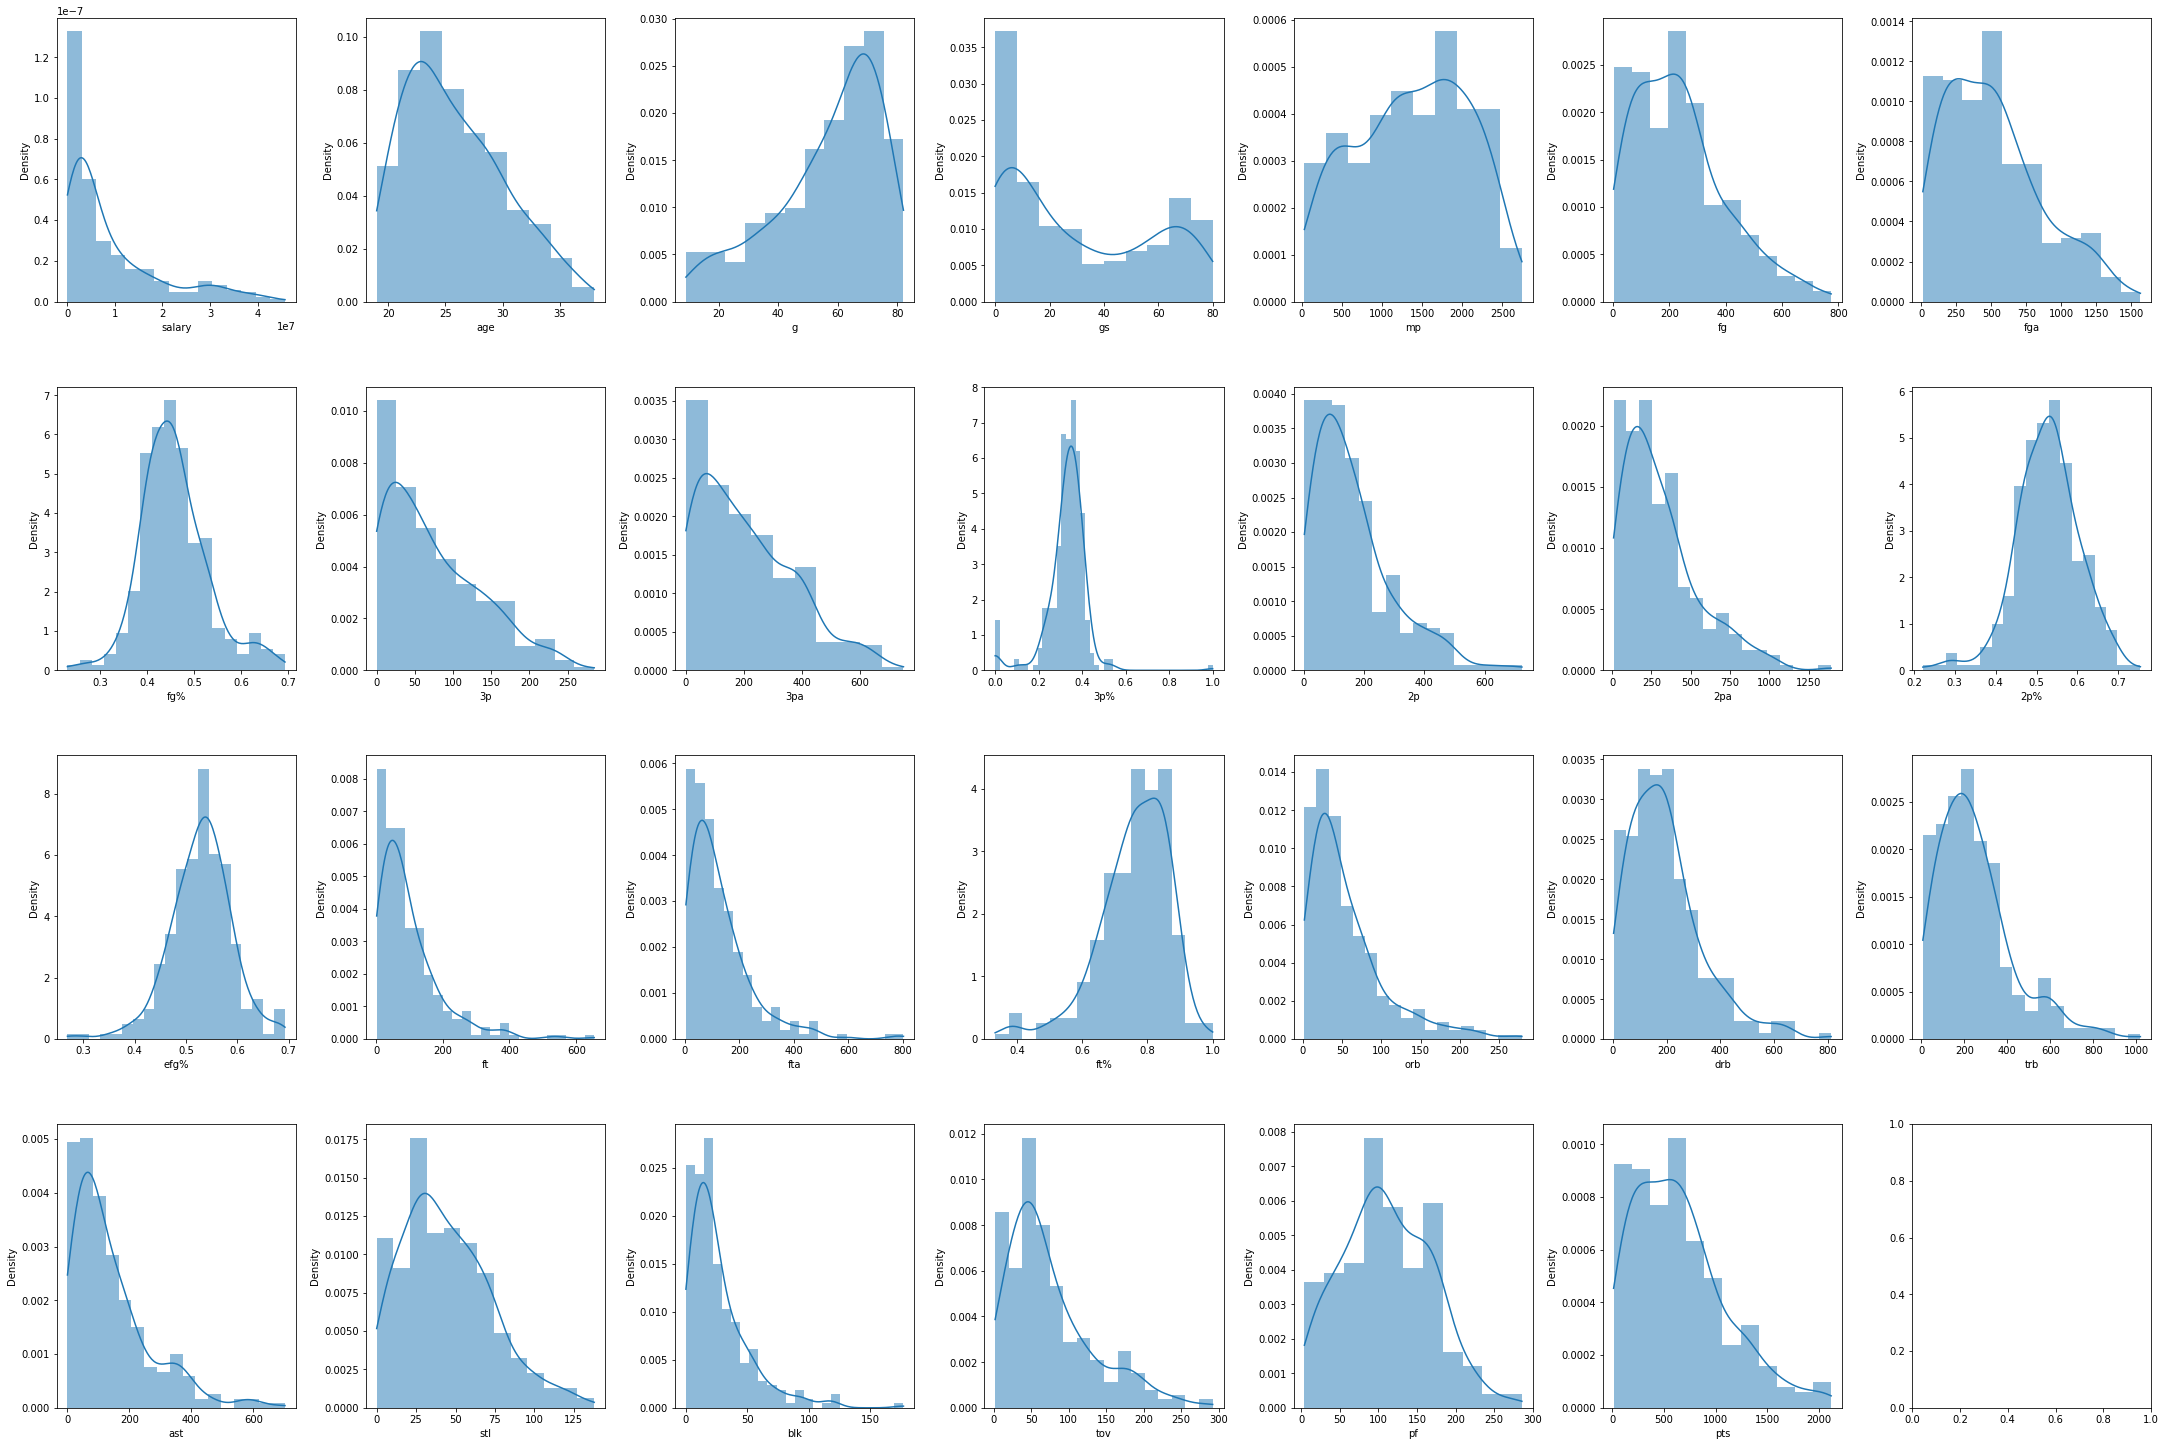

In [10]:
fig, axs = plt.subplots(nrows=4, ncols=7,figsize=(30,20))
index = 0
axs = axs.flatten()
for k,v in nba_data_numeric.items():
  sns.histplot(v, ax=axs[index], kde=True, stat='density', linewidth=0)
  index +=1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=5)

### Correlation matrix

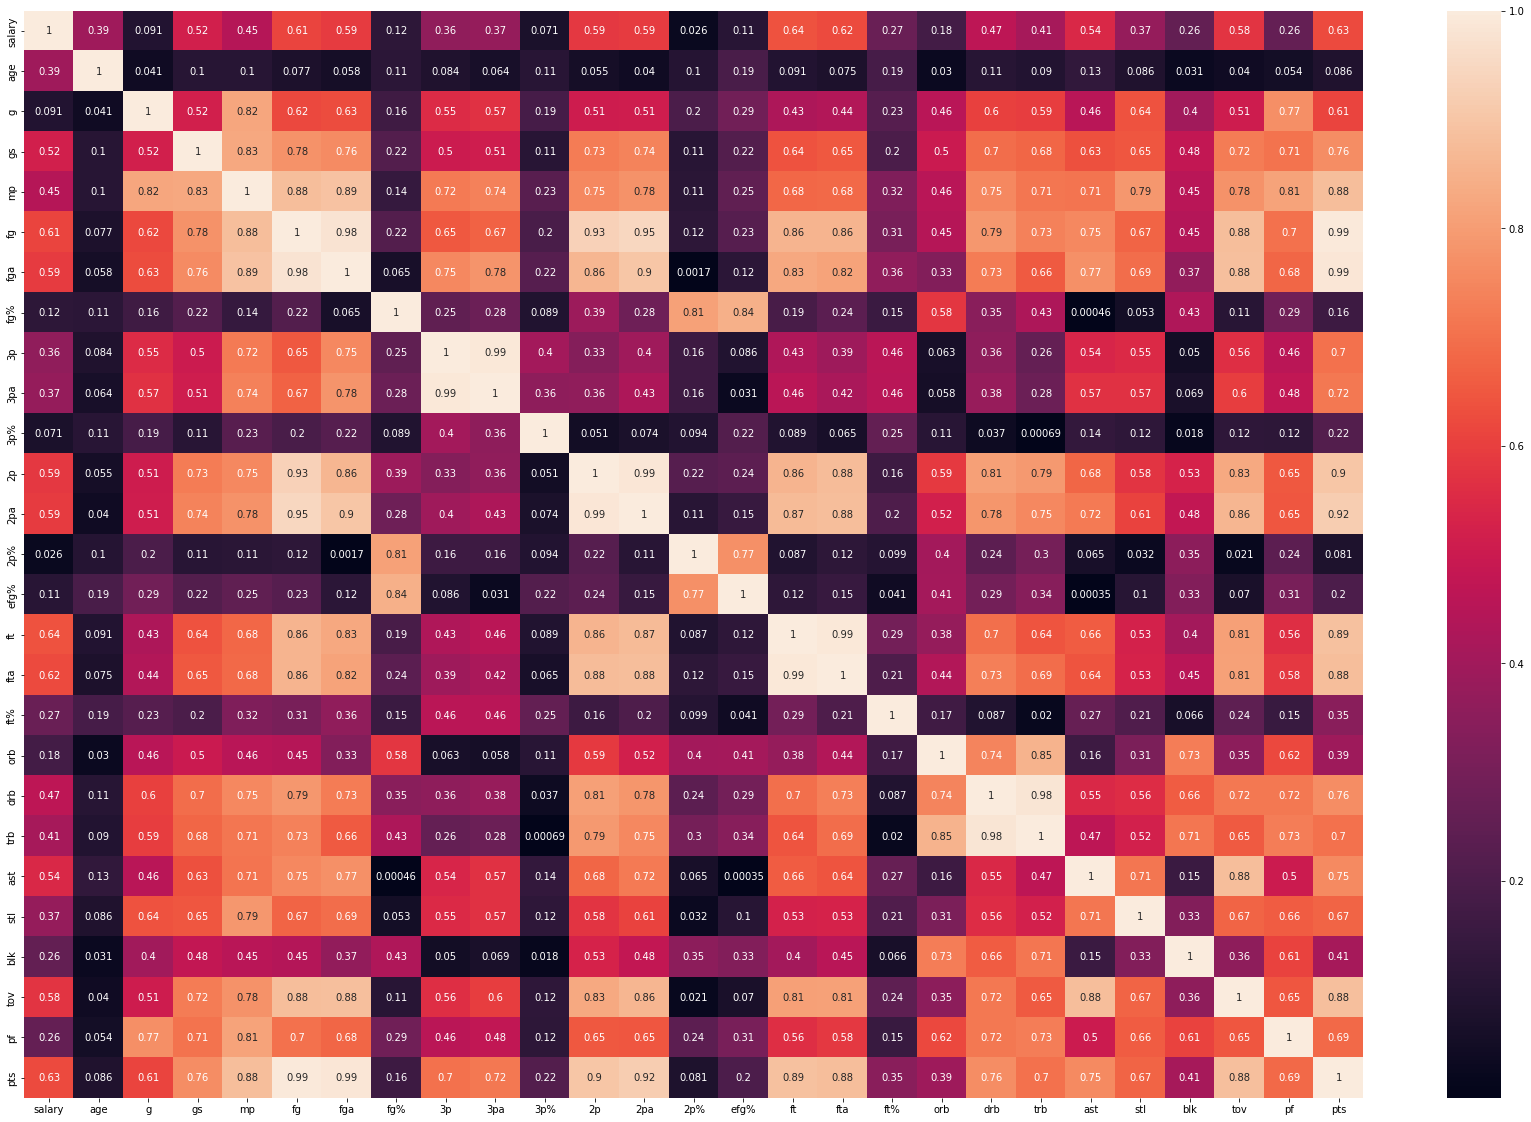

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(nba_data_numeric.corr().abs(), annot=True)

# Preprocess Data

### Normalize and One hot encode data

In [50]:
# # Basic
# ct = make_column_transformer(
#     (MinMaxScaler(),['pts', 'ft']),
#     # (sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore'),['pos'])
# )

# # Correlated more than 50%
# ct = make_column_transformer(
#     (MinMaxScaler(),['gs', 'fg', 'fga', '2p', '2pa', 'ft', 'fta', 'ast', 'tov', 'pts']),
# )

# Everything
ct = make_column_transformer(
    (MinMaxScaler(),['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg%', '3p', '3pa',
       '3p%', '2p', '2pa', '2p%', 'efg%', 'ft', 'fta', 'ft%', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']),
)

# Process Data

### Separate features and labels

In [51]:
X = nba_data_numeric.drop('salary', axis=1) # Features
y = nba_data_numeric['salary'] # Labels

### Separate training and testing data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=26)

### Transform data

In [53]:
ct.fit(X_train)
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)
# X_train_normalized

# Build Neural Network

In [54]:
tf.random.set_seed(26)
nba_model = tf.keras.Sequential([
    # 4 hidden layers with 3 having 100 neurons
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1),
]
)
# Mean Absolute Error - average of error between predictions and observed data
nba_model.compile(
    optimizer='Adam',
    loss='mae', 
    metrics=['mae']
)
fit_data = nba_model.fit(X_train_normalized, y_train, epochs=1000, verbose=0)

### Evaluate model

In [38]:
# Basic
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normalized, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 4813115.5000 - mae: 4813115.5000


In [49]:
# Correlated
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normalized, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 4537399.5000 - mae: 4537399.5000


In [55]:
# Everything
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normalized, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 4098901.2500 - mae: 4098901.2500


In [56]:
nba_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 100)               2700      
                                                                 
 dense_29 (Dense)            (None, 100)               10100     
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dense_31 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________


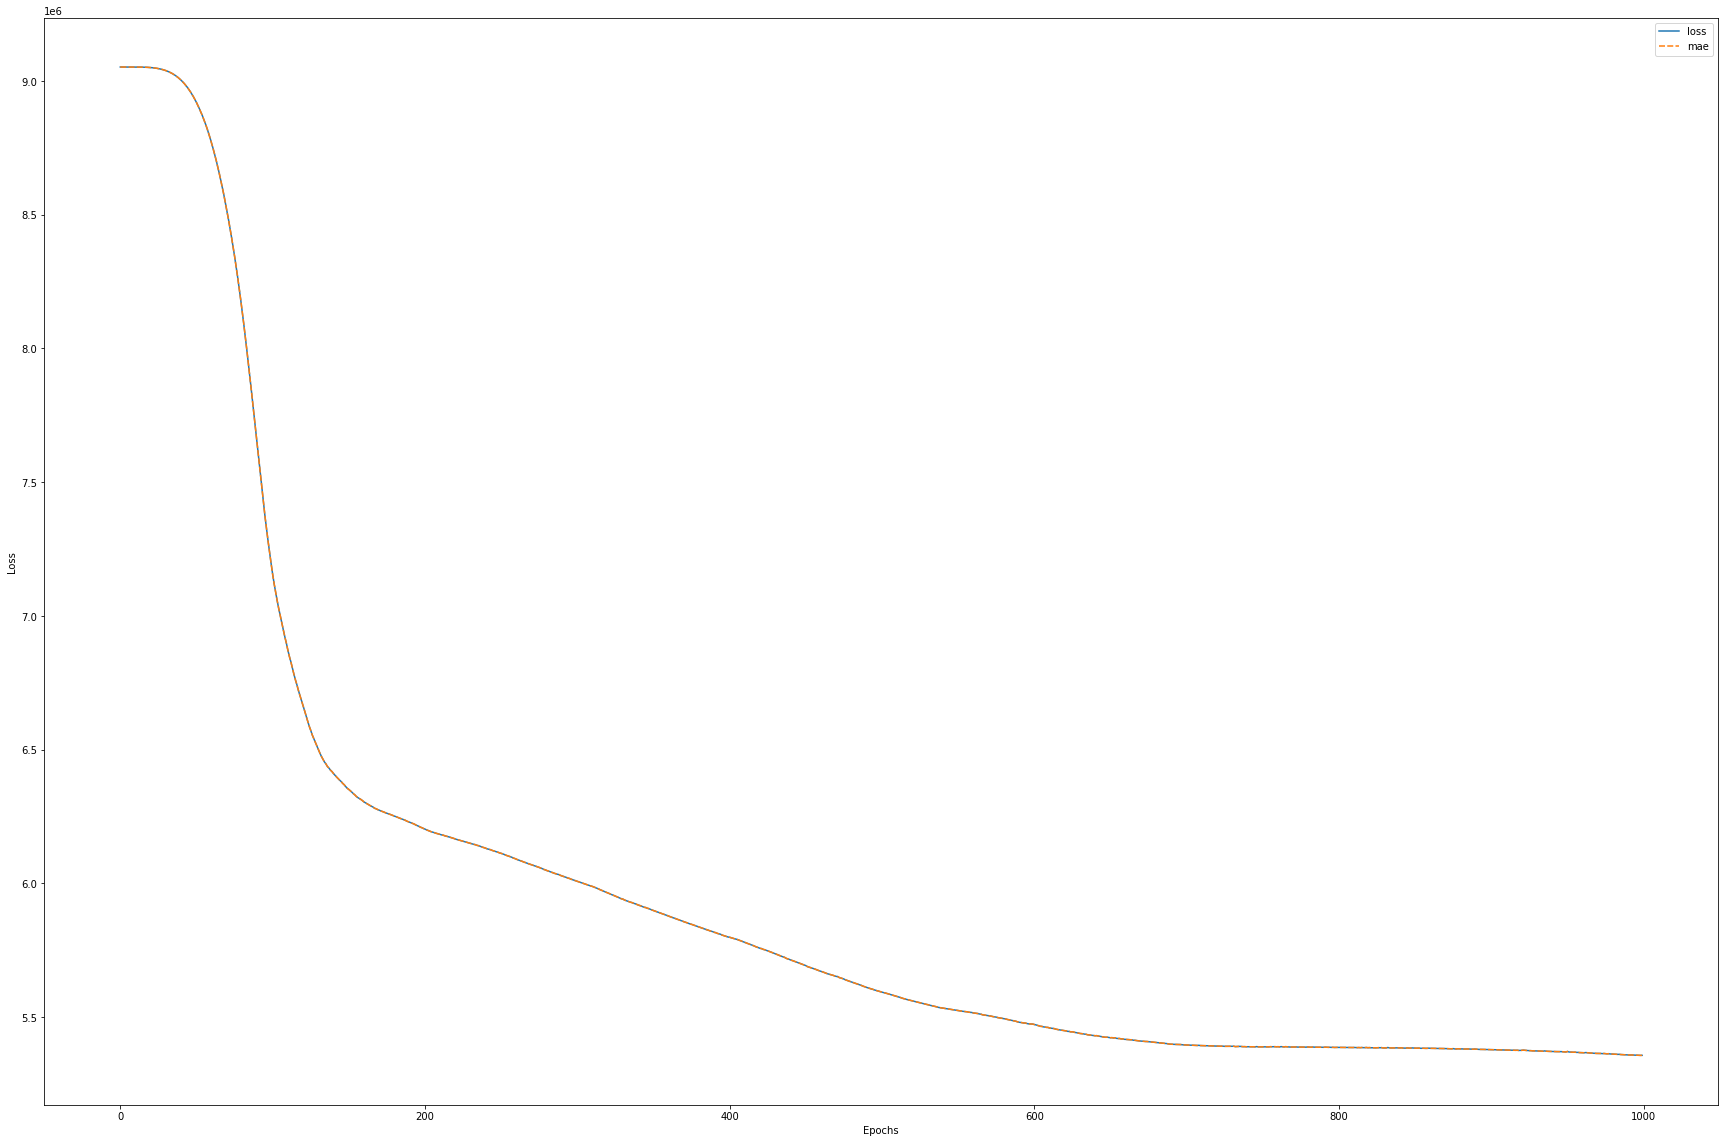

In [39]:
plt.figure(figsize=(30,20))
plt.ylabel('Loss')
plt.xlabel('Epochs')
sns.lineplot(data=fit_data.history)